## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
data = pd.read_csv('..\data\Wine-dataset.csv', sep=',')
data.head()

,Type/Class,Alcohol,Malic acid,Ash,Alkanility of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 14)

## Exploratory Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type/Class                    178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alkanility of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

No null values in the dataset

In [5]:
data.describe()

,Type/Class,Alcohol,Malic acid,Ash,Alkanility of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.duplicated().sum()

np.int64(0)

No duplicate data

<Axes: >

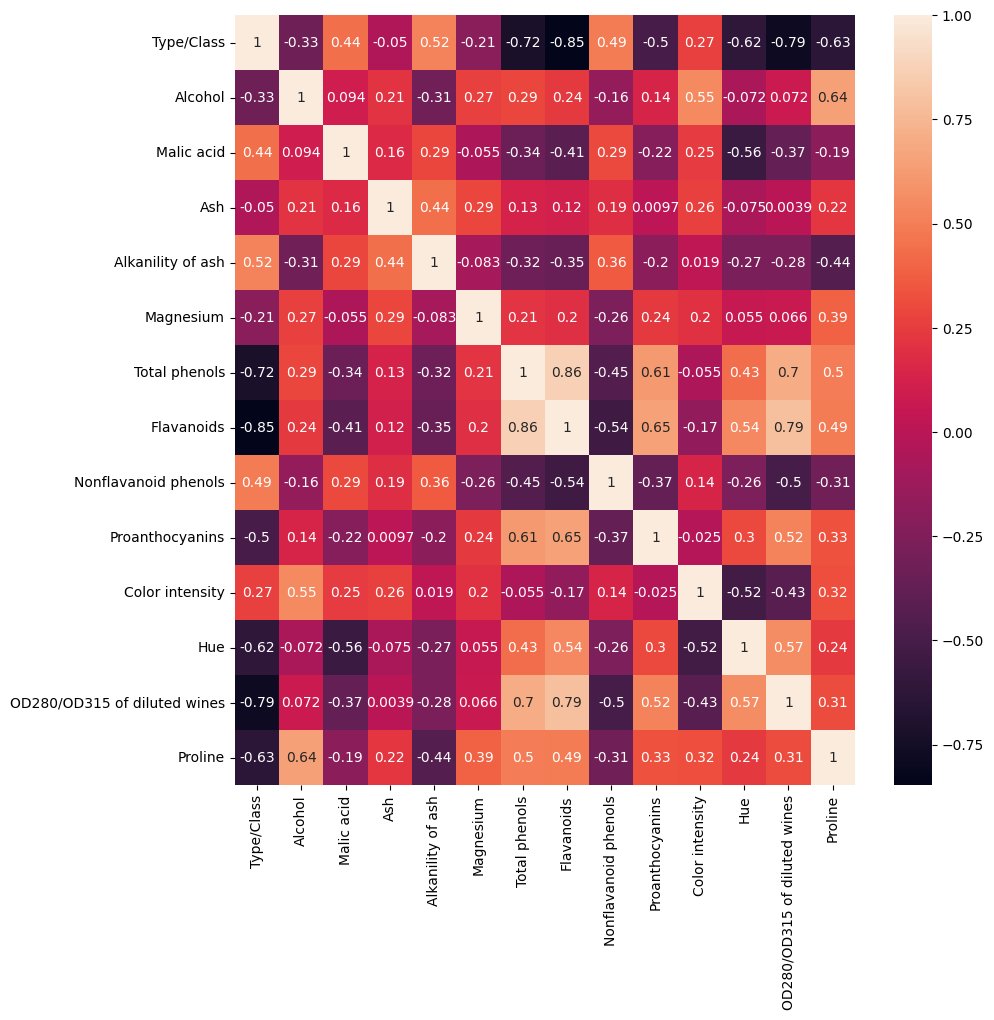

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True),annot=True)

### High Correlation

* total phenols and Flavanoids (+ve) - because  Total Phenols measurement includes flavonoids and other phenolic compounds (like non-flavonoids)

In [8]:
data['Type/Class'].value_counts()

Type/Class
2    71
1    59
3    48
Name: count, dtype: int64

class 3 has least number of samples in the data

## Computing Statistical Summary of Data

In [9]:
summary_table = (
    data.groupby("Type/Class")
        .agg(["min", "mean", "max"])   # compute all three stats
        .round(3)                      # round for readability
)

pd.set_option('display.max_columns', None)

summary_table

Alcohol                Malic acid                Ash               \
               min    mean    max        min   mean   max   min   mean   max   
Type/Class                                                                     
1            12.85  13.745  14.83       1.35  2.011  4.04  2.04  2.456  3.22   
2            11.03  12.279  13.86       0.74  1.933  5.80  1.36  2.245  3.23   
3            12.20  13.154  14.34       1.24  3.334  5.65  2.10  2.437  2.86   

           Alkanility of ash               Magnesium                \
                         min    mean   max       min     mean  max   
Type/Class                                                           
1                       11.2  17.037  25.0        89  106.339  132   
2                       10.6  20.238  30.0        70   94.549  162   
3                       17.5  21.417  27.0        80   99.312  123   

           Total phenols              Flavanoids               \
                     min   mean   max        min   mean   max   
Type/Class                                                      
1                   2.20  2.840  3.88       2.19  2.982  3.93   
2                   1.10  2.259  3.52       0.57  2.081  5.08   
3                   0.98  1.679  2.80       0.34  0.781  1.57   

           Nonflavanoid phenols              Proanthocyanins               \
                            min   mean   max             min   mean   max   
Type/Class                                                                  
1                          0.17  0.290  0.50            1.25  1.899  2.96   
2                          0.13  0.364  0.66            0.41  1.630  3.58   
3                          0.17  0.448  0.63            0.55  1.154  2.70   

           Color intensity                Hue               \
                       min   mean   max   min   mean   max   
Type/Class                                                   
1                     3.52  5.528   8.9  0.82  1.062  1.28   
2                     1.28  3.087   6.0  0.69  1.056  1.71   
3                     3.85  7.396  13.0  0.48  0.683  0.96   

           OD280/OD315 of diluted wines              Proline                  
                                    min   mean   max     min      mean   max  
Type/Class                                                                    
1                                  2.51  3.158  4.00     680  1115.712  1680  
2                                  1.59  2.785  3.69     278   519.507   985  
3                                  1.27  1.684  2.47     415   629.896   880

### Analysis for targeted marketing:

* class 2 generally contains less alcohol than class 1 and 3
* Class 2 has large variation in magnesium, Flavanoids, and Proanthocyanins content while other two classes are more balanced
* Class 3 has high color intensity in general while class 2 has less color intensity
* Class 1 has large proline content than other two classes  

## Outlier Detection

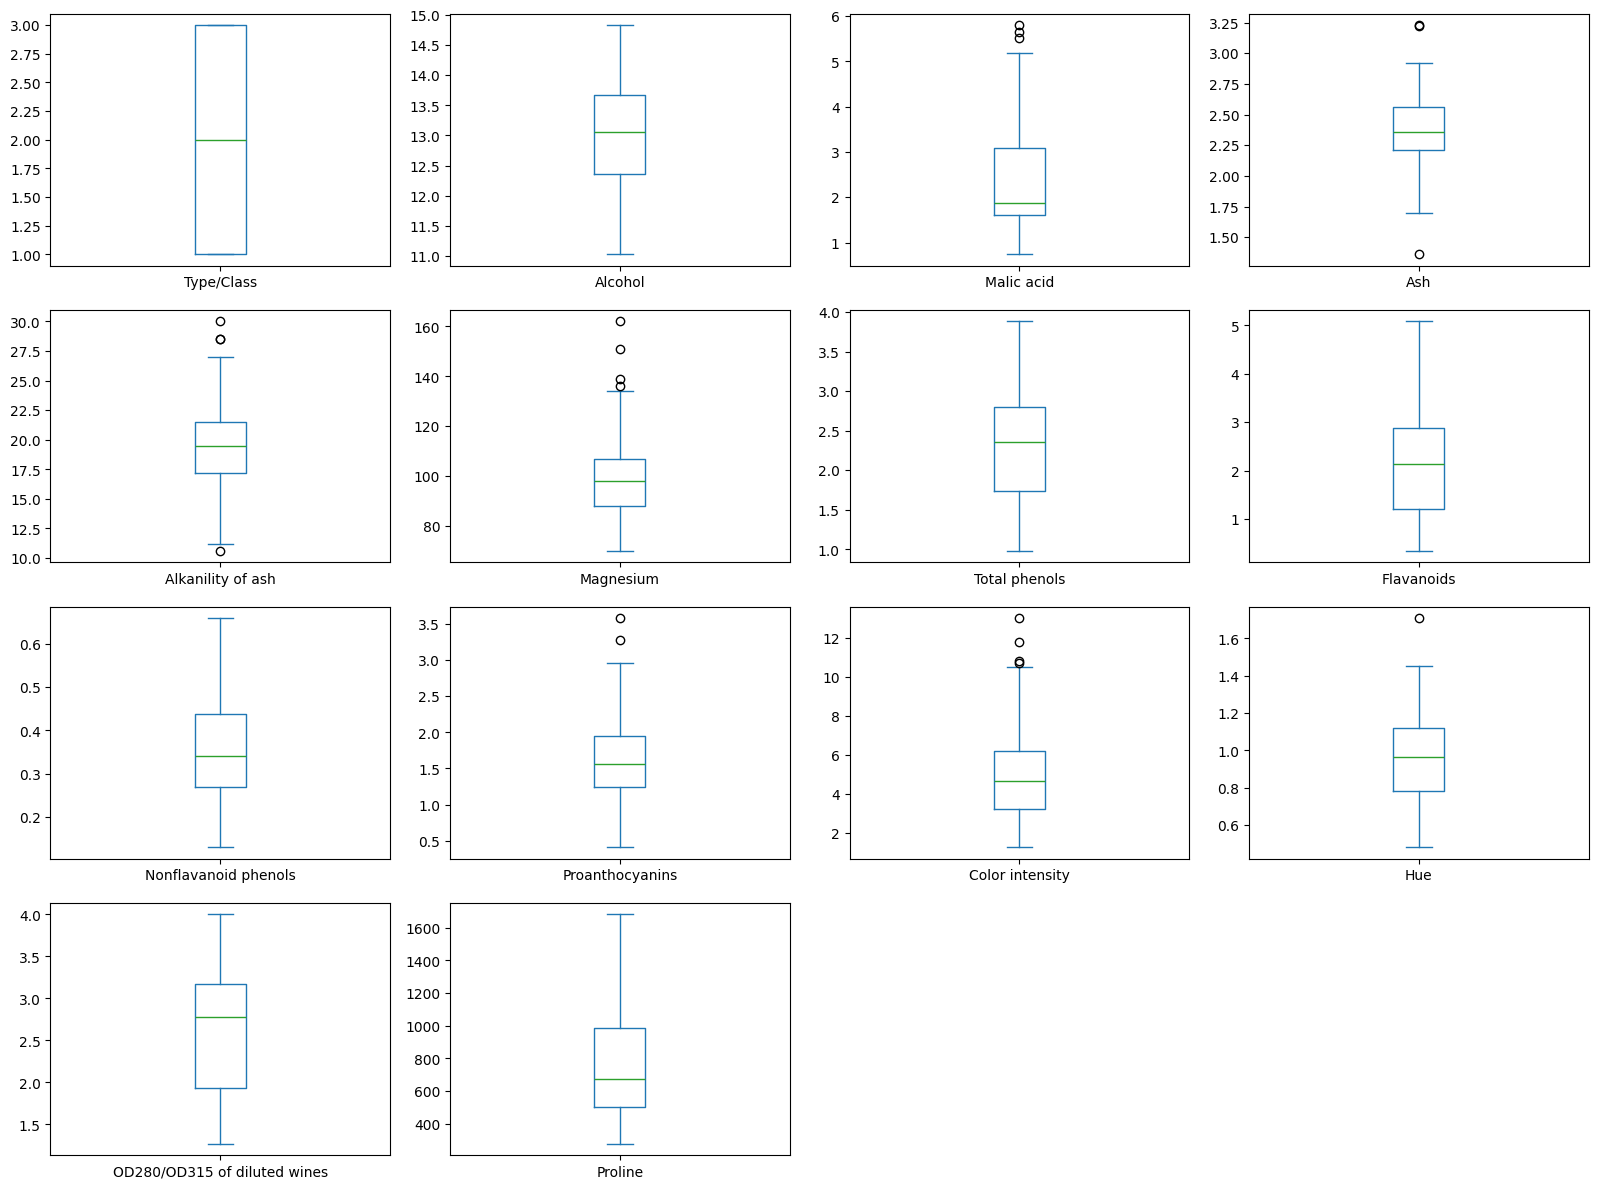

In [10]:
import math

numeric_data = data.select_dtypes(include='number')

n_features = numeric_data.shape[1]

n_cols = 4
n_rows = 4

# Create boxplots
numeric_data.plot(
    kind="box",
    subplots=True,
    layout=(n_rows, n_cols),
    figsize=(4*n_cols, 3*n_rows),
    sharey=False
)

plt.tight_layout()
plt.show()


In [11]:
from tabulate import tabulate 

numeric_data = data.drop(columns=['Type/Class'], axis=1)

# Compute Z-scores
z_scores = np.abs(stats.zscore(numeric_data))
z_df = pd.DataFrame(z_scores, columns=numeric_data.columns, index=numeric_data.index)

threshold = 3     # 99.7 percentage of data is captured

for col in z_df.columns:
    outlier_idx = z_df[z_df[col] > threshold].index
    if len(outlier_idx) > 0:
        print("="*80)
        print(f"📌 Feature: {col} | Outliers Found: {len(outlier_idx)}")
        print("="*80)
        print(tabulate(data.loc[outlier_idx], headers="keys", tablefmt="pretty", showindex=True))
        print("\n")


📌 Feature: Malic acid | Outliers Found: 1
+-----+------------+---------+------------+------+-------------------+-----------+---------------+------------+----------------------+-----------------+-----------------+------+------------------------------+---------+
|     | Type/Class | Alcohol | Malic acid | Ash  | Alkanility of ash | Magnesium | Total phenols | Flavanoids | Nonflavanoid phenols | Proanthocyanins | Color intensity | Hue  | OD280/OD315 of diluted wines | Proline |
+-----+------------+---------+------------+------+-------------------+-----------+---------------+------------+----------------------+-----------------+-----------------+------+------------------------------+---------+
| 123 |    2.0     |  13.05  |    5.8     | 2.13 |       21.5        |   86.0    |     2.62      |    2.65    |         0.3          |      2.01       |       2.6       | 0.73 |             3.1              |  380.0  |
+-----+------------+---------+------------+------+-------------------+-----------+

Out of 11 outliers, 9 are from class 2

In [12]:
"""Checking if color intensity outlier is a data error or not because the mean value of color intensity 
in the describe table is very less than what we got in outlier table."""

# Exclude row 158
data_excluded = data.drop(index=158)

# Filter rows where Type/Class = 3
type3_data = data_excluded[data_excluded['Type/Class'] == 3]

# Compute average of Color intensity
avg_color_intensity = type3_data['Color intensity'].mean()

print(f"Average Color intensity for Type/Class = 3 (excluding row 158): {avg_color_intensity}")
print(f"Max Color intensity for Type/Class = 3 (excluding row 158): {type3_data['Color intensity'].max()}")

###########################

type1_data = data_excluded[data_excluded['Type/Class'] == 1]
print(f"Average Color intensity for Type/Class = 1: {type1_data['Color intensity'].mean()}")
print(f"Max Color intensity for Type/Class = 1: {type1_data['Color intensity'].max()}")

type2_data = data_excluded[data_excluded['Type/Class'] == 2]
print(f"Average Color intensity for Type/Class = 2: {type2_data['Color intensity'].mean()}")
print(f"Max Color intensity for Type/Class = 2: {type2_data['Color intensity'].max()}")


Average Color intensity for Type/Class = 3 (excluding row 158): 7.2770212553191485
Max Color intensity for Type/Class = 3 (excluding row 158): 11.75
Average Color intensity for Type/Class = 1: 5.528305084745763
Max Color intensity for Type/Class = 1: 8.9
Average Color intensity for Type/Class = 2: 3.086619718309859
Max Color intensity for Type/Class = 2: 6.0


Since mean and max value of colour intensity of class 3 is much higher than other 2 classes, the outlier identified for color intensity isn't a error

## Histogram Plots

#### How different features are distributed

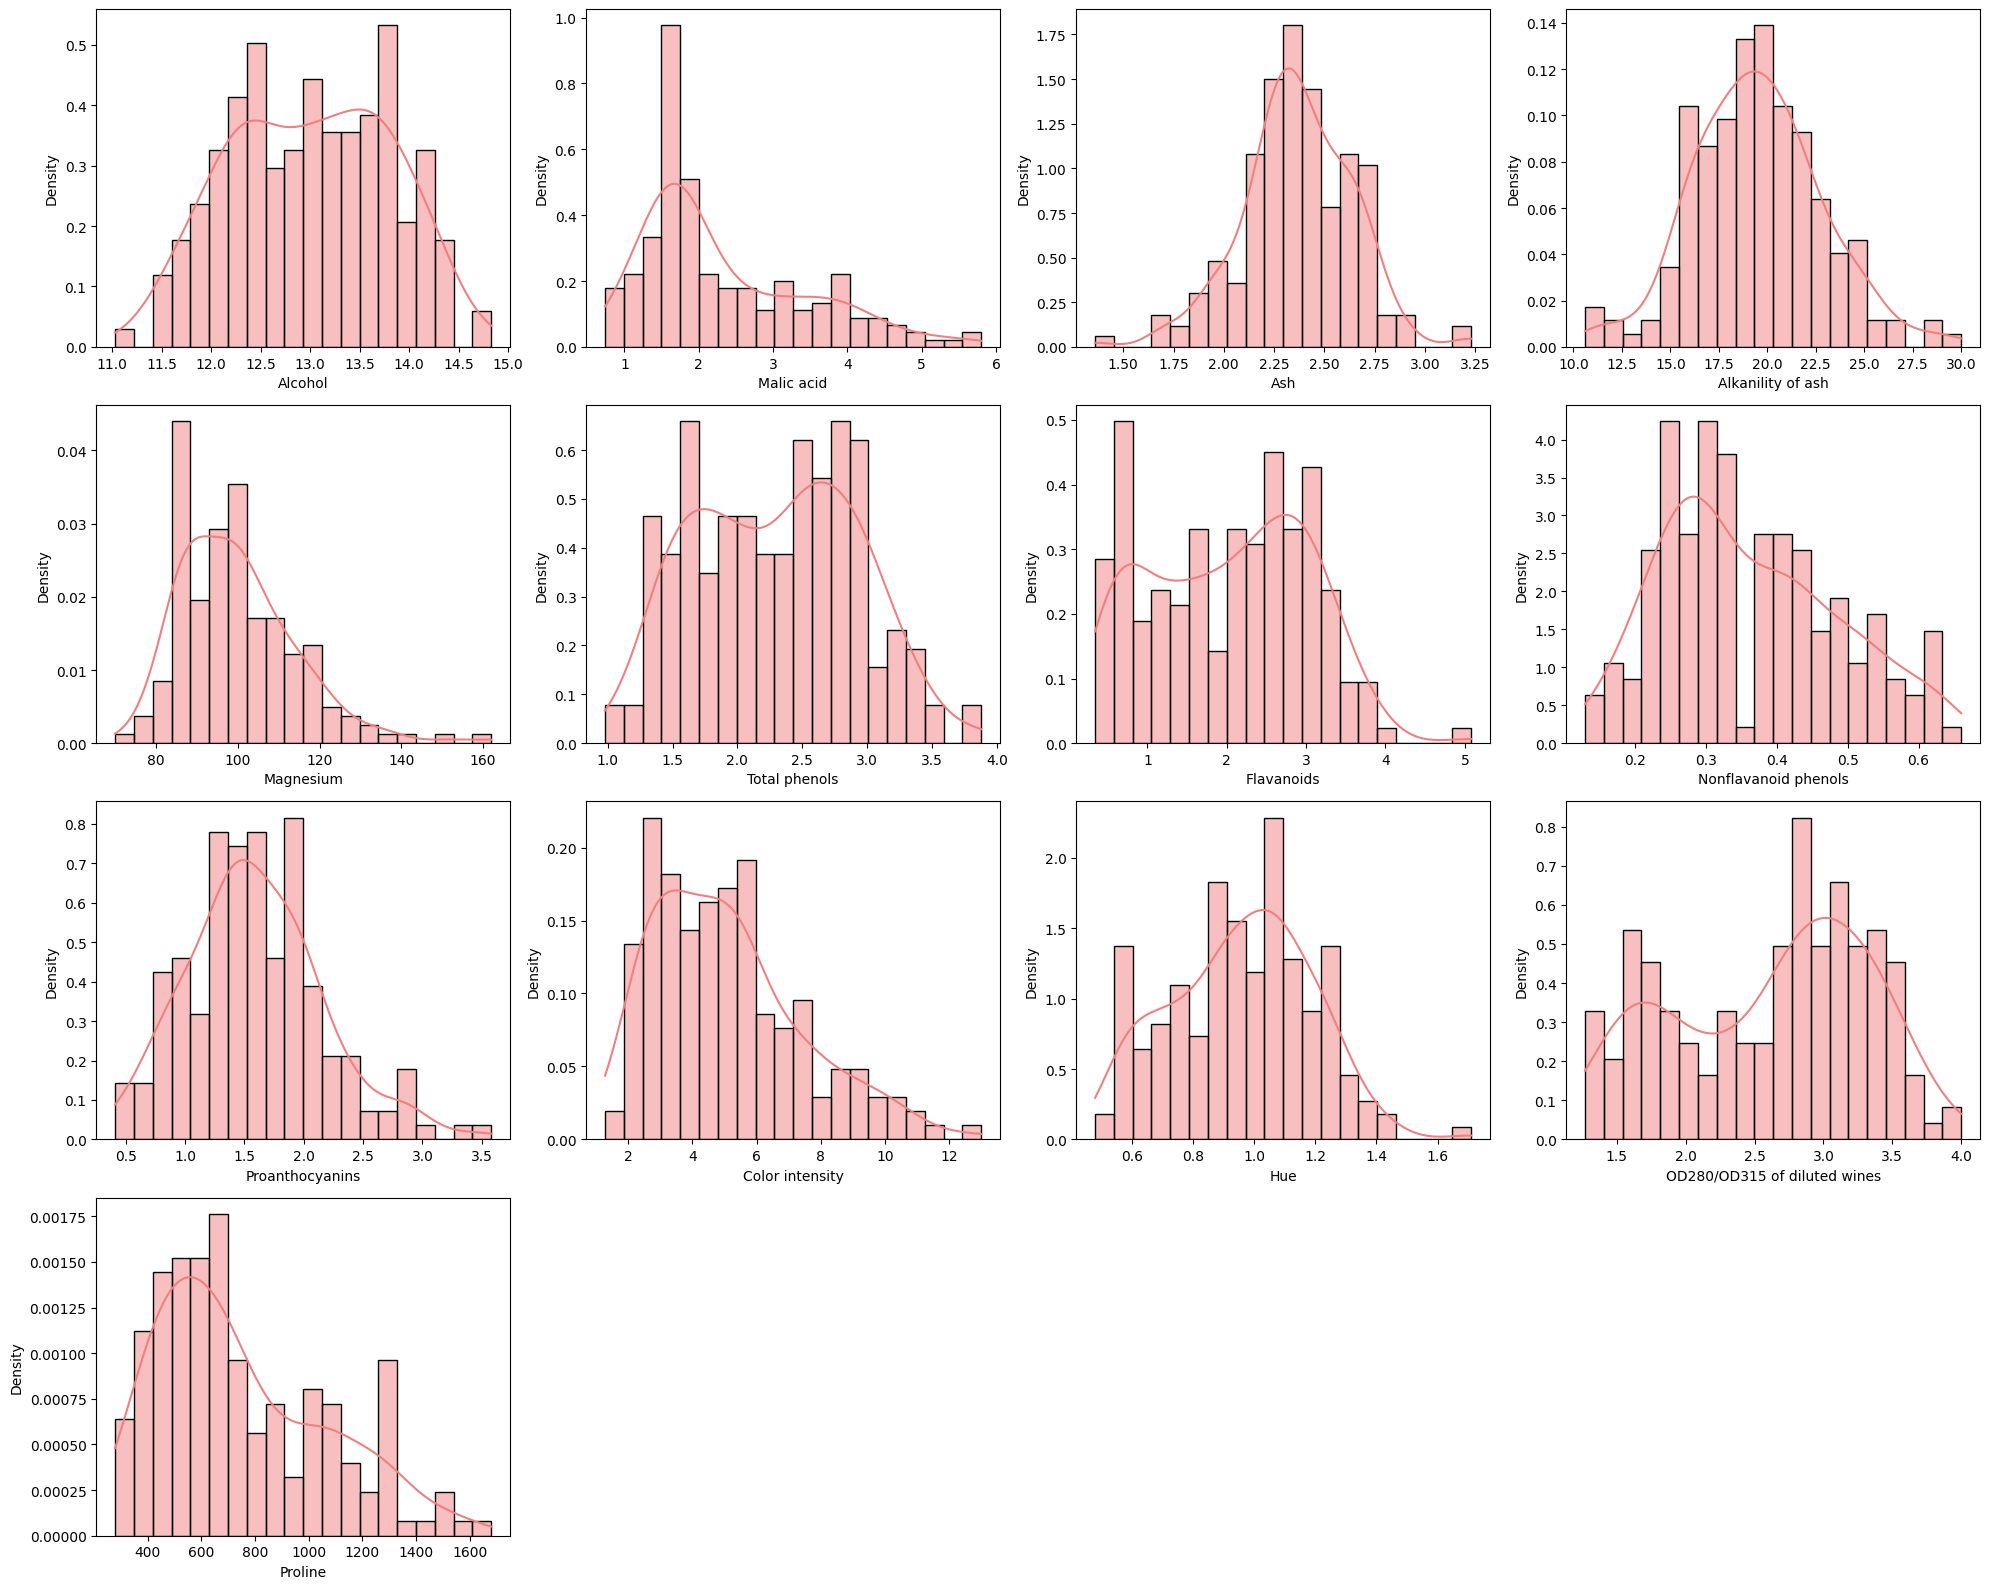

In [13]:
features = data.drop(columns=["Type/Class"])

n_features = len(features.columns)

# Plot settings
fig, axes = plt.subplots(nrows=(n_features // 4) + 1, ncols=4, figsize=(20, 4*((n_features // 4) + 1)))
axes = axes.flatten()

for i, col in enumerate(features.columns):
    ax = axes[i]
    
    # Histogram
    sns.histplot(features[col], kde=True, stat="density", bins=20, color="lightcoral", ax=ax)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Feature Engineering

### PCA - Not required as discussed

In [14]:
# X = data.drop(columns=['Type/Class'], axis=1)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Apply PCA
# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)

# # Explained variance ratio
# explained_variance = pca.explained_variance_ratio_
# print("Explained variance ratio per component:\n", explained_variance)
# print("Cumulative explained variance:\n", np.cumsum(explained_variance))

# # Scree plot
# plt.figure(figsize=(8,5))
# plt.plot(np.cumsum(explained_variance), marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance by PCA Components')
# plt.grid(True)
# plt.show()

In [15]:
# loadings = pd.DataFrame(
#     pca.components_.T,
#     columns=[f'PC{i+1}' for i in range(len(X.columns))],
#     index=X.columns
# )

# # Heatmap of feature contributions
# plt.figure(figsize=(10,7))
# sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
# plt.title("Feature Contributions to Principal Components")
# plt.show()

In [16]:
# important_pcs = np.cumsum(pca.explained_variance_ratio_) <= 0.95  # PCs covering 95% data variance
# loadings_abs = np.abs(loadings.loc[:, important_pcs])
# pca_feature_importance = loadings_abs.mean(axis=1).sort_values(ascending=False)

# print("\nPCA-based feature importance:\n", pca_feature_importance)


# Clustering

### Elbow Method to find number of clusters

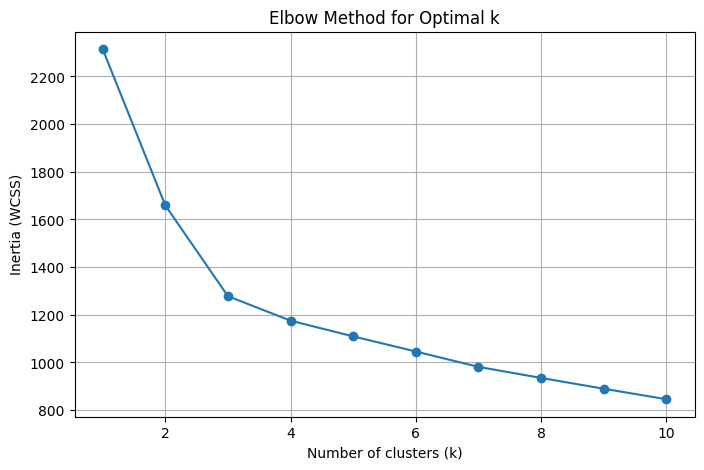

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = data.drop(columns=['Type/Class'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia = []
K_range = range(1, 11)  # test k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


3 clusters would be best for our data

## Method-1 

### Taking all variables into account

In [18]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score


target_col = "Type/Class"
y = data[target_col]
X = data.drop(columns=[target_col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###################################

# Since this is unsupervised learning, we don't need to split the data into train and test sets.

###################################

# --- KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# --- DBSCAN ---
dbscan = DBSCAN(eps=2.1, min_samples=5)   # eps=2.1 only gives 3 clusters
dbscan_labels = dbscan.fit_predict(X_scaled)

# --- Agglomerative Clustering ---
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg.fit_predict(X_scaled)


# Evaluation function
def evaluate_clustering(name, labels, X_scaled):
    ari = adjusted_rand_score(y, labels)       # how similar the predicted clusters are to the true classes
    nmi = normalized_mutual_info_score(y, labels)    # NMI measures how much information the cluster labels share with the true class labels.

    # Silhouette Score (only if >1 cluster and not all noise)
    sil = None
    if len(set(labels)) > 1 and len(set(labels)) != 1:
        try:
            sil = silhouette_score(X_scaled, labels)
        except Exception:
            sil = None

    print(f"\n{name} Clustering Results:")
    print("ARI:", round(ari, 3), "| NMI:", round(nmi, 3), "| Silhouette:", round(sil, 3) if sil else "N/A")
    print(pd.crosstab(labels, y)) 


# --- Run evaluations ---
evaluate_clustering("KMeans", kmeans_labels, X_scaled)
evaluate_clustering("DBSCAN", dbscan_labels, X_scaled)
evaluate_clustering("Agglomerative", agg_labels, X_scaled)



KMeans Clustering Results:
ARI: 0.897 | NMI: 0.876 | Silhouette: 0.285
Type/Class   1   2   3
row_0                 
0            0  65   0
1            0   3  48
2           59   3   0

DBSCAN Clustering Results:
ARI: 0.274 | NMI: 0.401 | Silhouette: 0.049
Type/Class   1   2   3
row_0                 
-1          10  38  14
 0          49  33   0
 1           0   0  13
 2           0   0  21

Agglomerative Clustering Results:
ARI: 0.79 | NMI: 0.786 | Silhouette: 0.277
Type/Class   1   2   3
row_0                 
0            0  58   0
1            0   8  48
2           59   5   0


## Method 2

### Removing flavanoids because it has high correlation with Total Phenols

In [19]:
target_col = "Type/Class"
y = data[target_col]
X = data.drop(columns=[target_col, "Flavanoids"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# --- DBSCAN ---
dbscan = DBSCAN(eps=2.1, min_samples=5)  
dbscan_labels = dbscan.fit_predict(X_scaled)

# --- Agglomerative Clustering ---
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg.fit_predict(X_scaled)

def evaluate_clustering(name, labels, X_scaled):
    ari = adjusted_rand_score(y, labels)       # how similar the predicted clusters are to the true classes
    nmi = normalized_mutual_info_score(y, labels)    # NMI measures how much information the cluster labels share with the true class labels.

    # Silhouette Score (only if >1 cluster and not all noise)
    sil = None
    if len(set(labels)) > 1 and len(set(labels)) != 1:
        try:
            sil = silhouette_score(X_scaled, labels)
        except Exception:
            sil = None

    print(f"\n{name} Clustering Results:")
    print("ARI:", round(ari, 3), "| NMI:", round(nmi, 3), "| Silhouette:", round(sil, 3) if sil else "N/A")
    print(pd.crosstab(labels, y)) 


evaluate_clustering("KMeans", kmeans_labels, X_scaled)
evaluate_clustering("DBSCAN", dbscan_labels, X_scaled)
evaluate_clustering("Agglomerative", agg_labels, X_scaled)



KMeans Clustering Results:
ARI: 0.88 | NMI: 0.861 | Silhouette: 0.277
Type/Class   1   2   3
row_0                 
0            0  64   0
1            0   3  48
2           59   4   0

DBSCAN Clustering Results:
ARI: 0.271 | NMI: 0.386 | Silhouette: 0.046
Type/Class   1   2   3
row_0                 
-1          10  36  13
 0          49  34   0
 1           0   0  13
 2           0   1  22

Agglomerative Clustering Results:
ARI: 0.714 | NMI: 0.702 | Silhouette: 0.26
Type/Class   1   2   3
row_0                 
0            0   8  48
1           56   7   0
2            3  56   0


## Method 1 works better

In both the methods, K-Means gave best results therefore choosing K-Means model for clustering

## Plotting Predicted vs Actual Wine Class

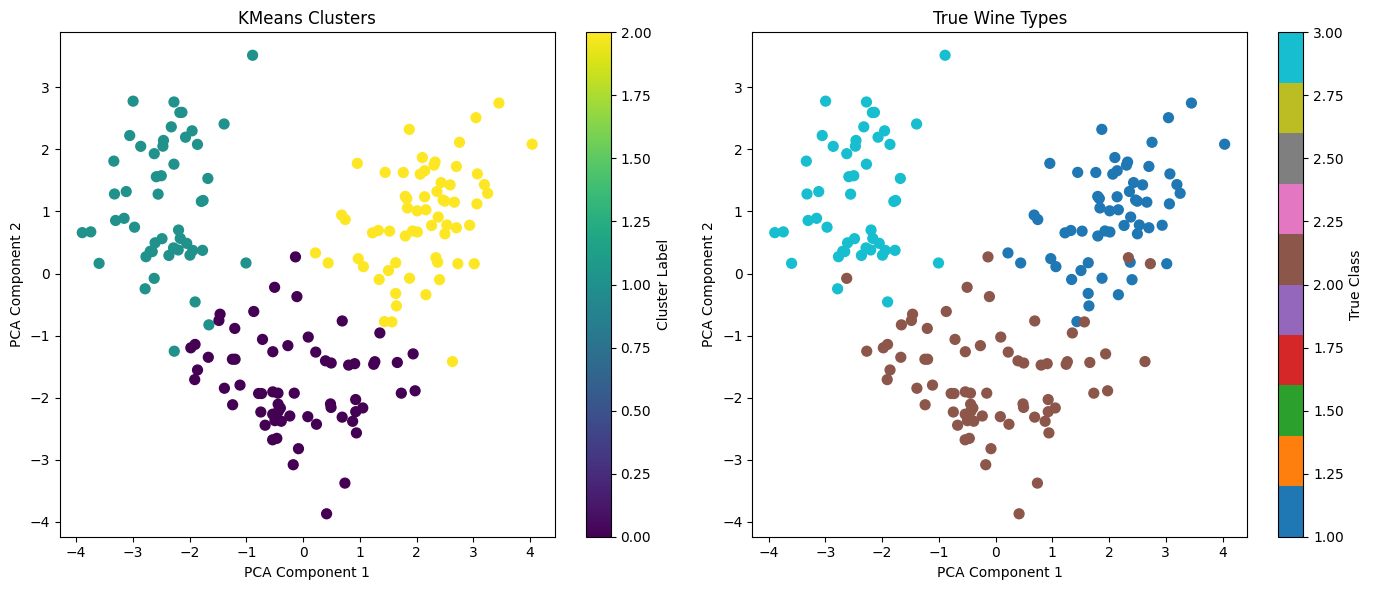

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# --- Plot KMeans clusters ---
scatter1 = axes[0].scatter(
    X_pca[:,0], X_pca[:,1], 
    c=kmeans_labels, cmap='viridis', s=50
)
axes[0].set_title("KMeans Clusters")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")
fig.colorbar(scatter1, ax=axes[0], label='Cluster Label')

# --- Plot True Classes ---
scatter2 = axes[1].scatter(
    X_pca[:,0], X_pca[:,1], 
    c=y, cmap='tab10', s=50
)
axes[1].set_title("True Wine Types")
axes[1].set_xlabel("PCA Component 1")
axes[1].set_ylabel("PCA Component 2")
fig.colorbar(scatter2, ax=axes[1], label='True Class')

plt.tight_layout()
plt.show()


In [21]:
"""
K-Means predicted class 2 corresponds to actual class 1
K-Means predicted class 1 corresponds to actual class 3
K-Means predicted class 0 corresponds to actual class 2
"""

mapping = {2: 1, 1: 3, 0: 2}

In [22]:
kmeans_mapped = pd.Series(kmeans_labels).map(mapping).values

misclassified_mask = kmeans_mapped != y.values

misclassified_df = data.loc[misclassified_mask].copy()
misclassified_df['Predicted_Cluster'] = kmeans_mapped[misclassified_mask]

misclassified_df


,Type/Class,Alcohol,Malic acid,Ash,Alkanility of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Predicted_Cluster
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,3
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,1
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985,1
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750,1
83,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515,3
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937,1
118,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372,3


Since all the misclassification are of class 2 we can imply:

* Class 2 wines may have larger variability
* OR
* Maybe some wines in Class 2 were mislabelled during data entry


### side-by-side comparison of summary statistics (min, mean, max) between:

* Misclassified data points

* Correct Class 2 data points (after removing misclassified ones)

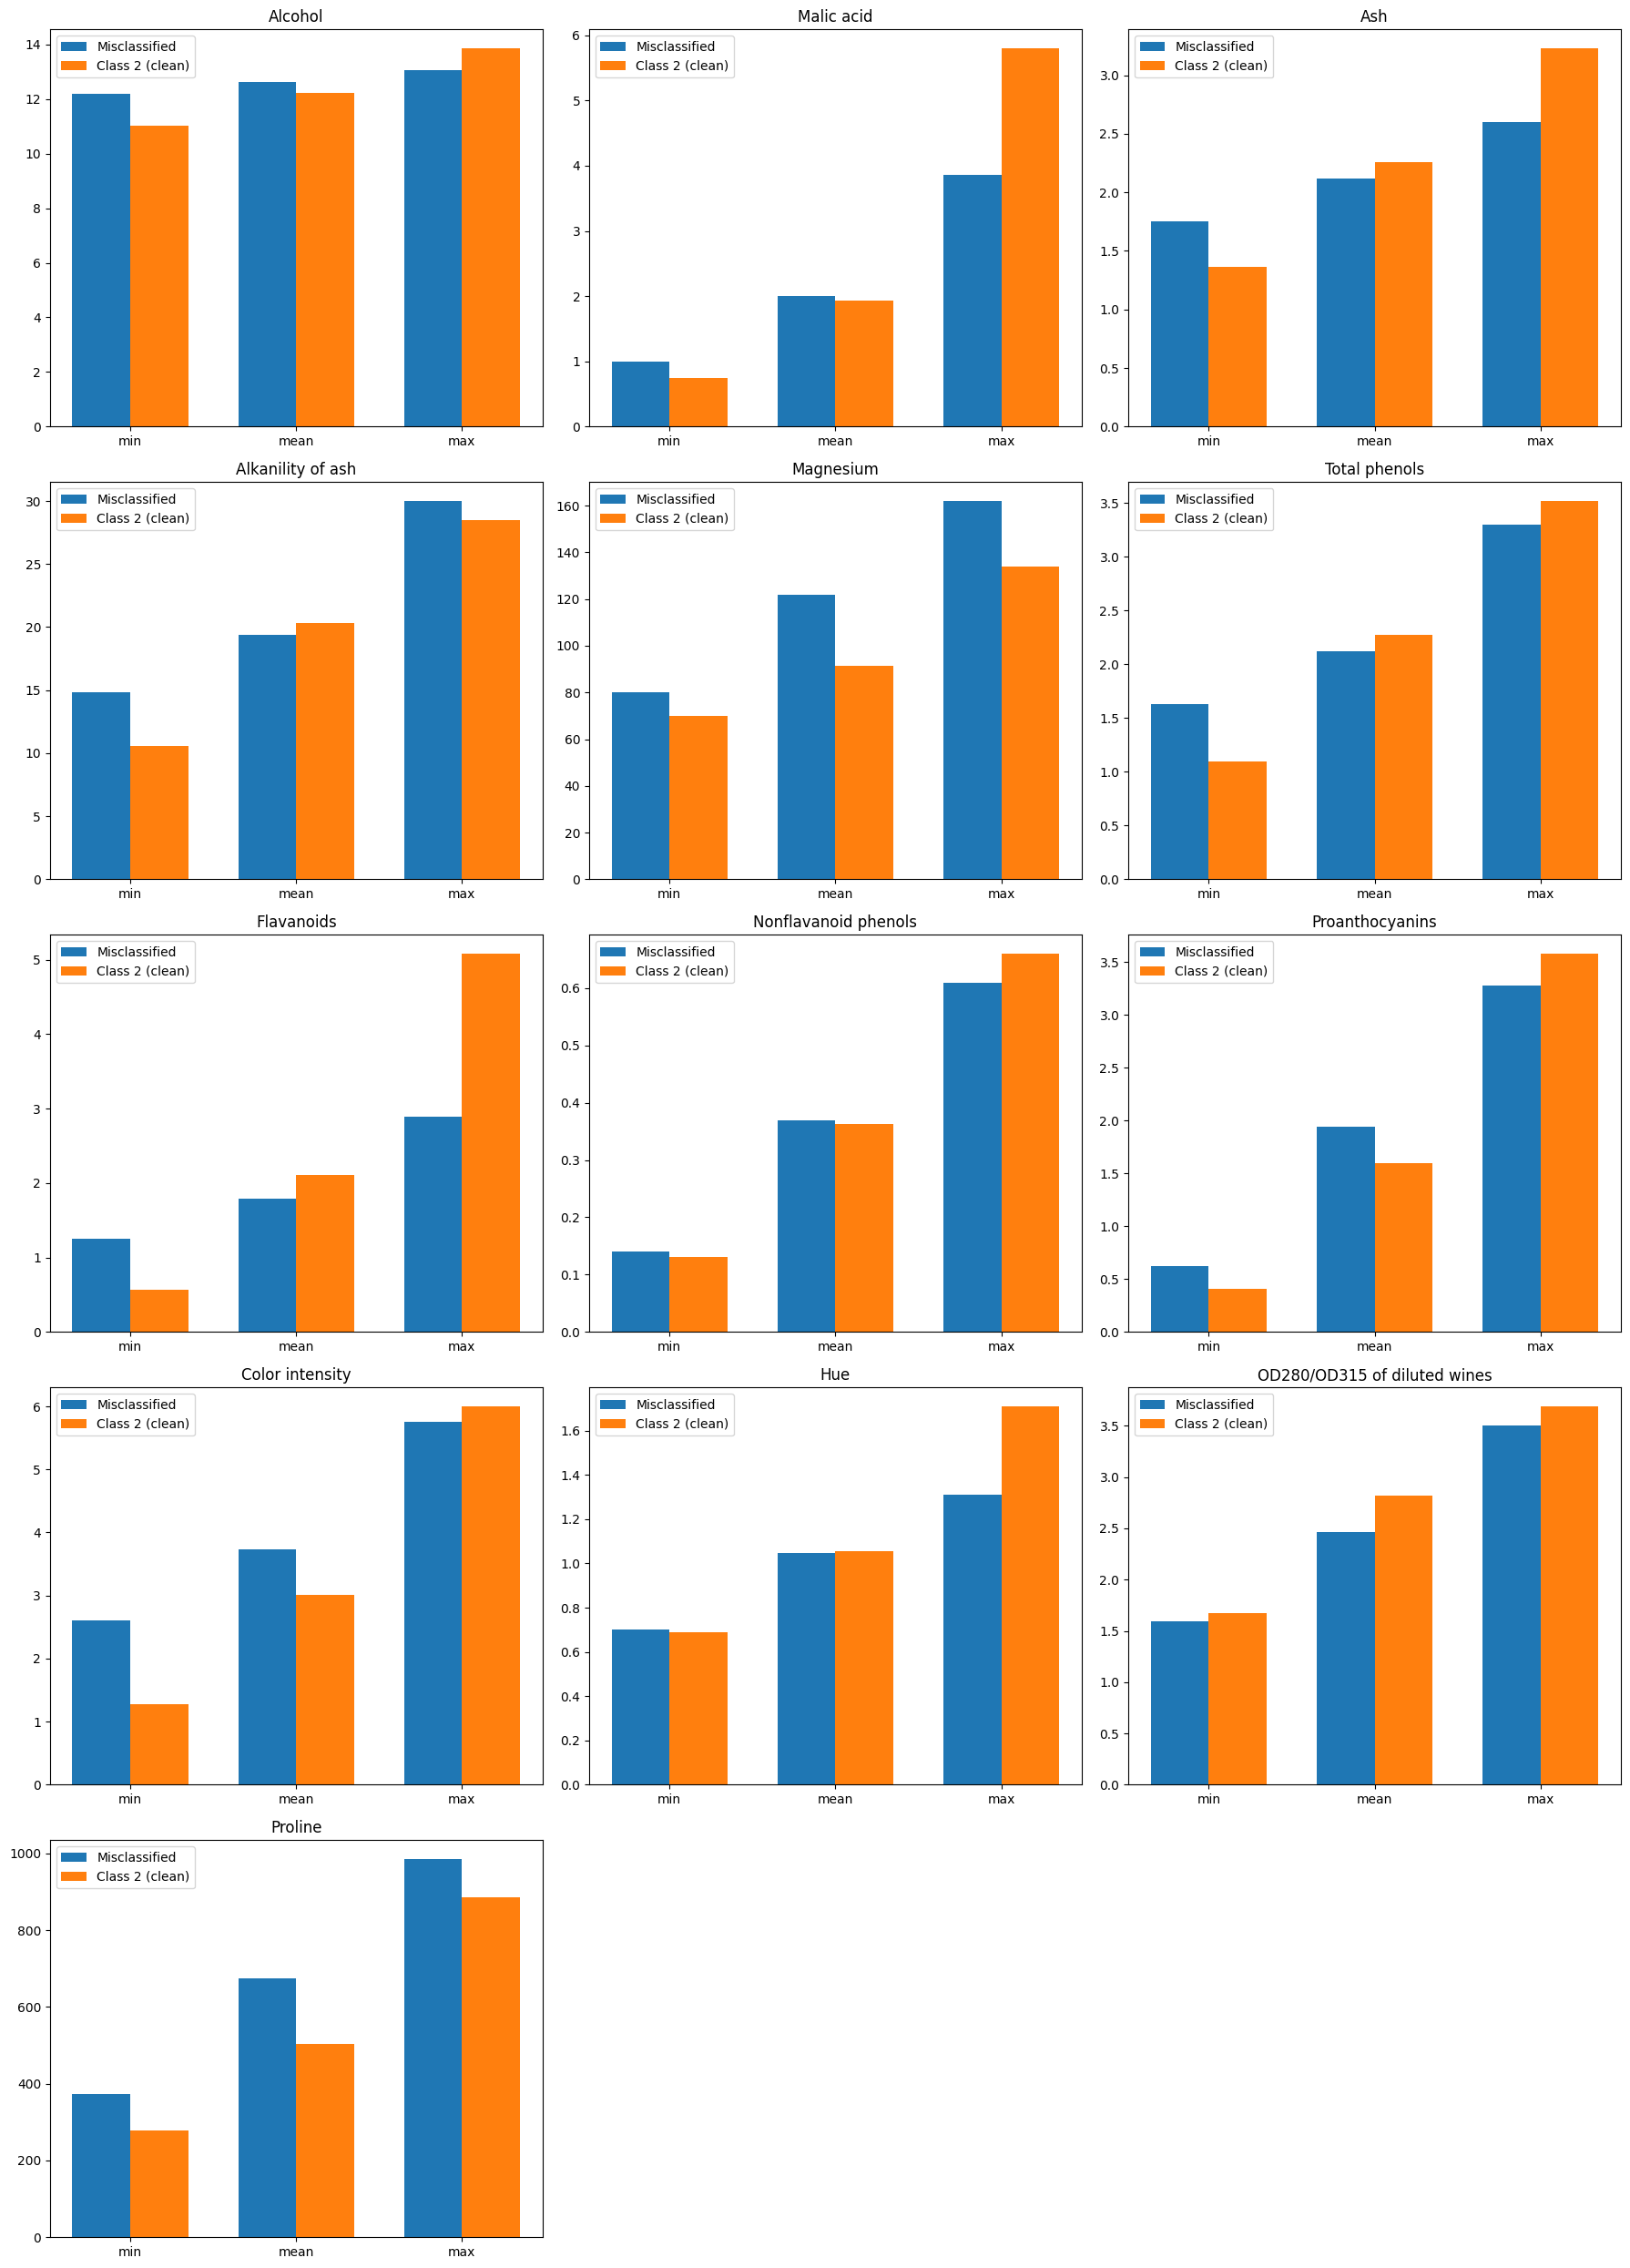

In [23]:

# Misclassified data
misclassified_stats = misclassified_df.drop(columns=[target_col, 'Predicted_Cluster']).agg(['min', 'mean', 'max'])

# Class 2 data (excluding misclassified rows)
class2_mask = (data[target_col] == 2) & (~data.index.isin(misclassified_df.index))
class2_data = data.loc[class2_mask].drop(columns=[target_col])
class2_stats = class2_data.agg(['min', 'mean', 'max'])

# --- Visualization ---
features = class2_data.columns
stats = ['min', 'mean', 'max']

fig, axes = plt.subplots(nrows=len(features)//3 + 1, ncols=3, figsize=(18, 5 * ((len(features)//3) + 1)))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    
    # Values for misclassified vs class 2
    values_mis = misclassified_stats[feature].values
    values_cls2 = class2_stats[feature].values
    
    # X-axis positions
    x = range(len(stats))
    width = 0.35
    
    ax.bar([p - width/2 for p in x], values_mis, width=width, label='Misclassified')
    ax.bar([p + width/2 for p in x], values_cls2, width=width, label='Class 2 (clean)')
    
    ax.set_xticks(x)
    ax.set_xticklabels(stats)
    ax.set_title(feature)
    ax.legend()

# Remove unused axes if features not multiple of 3
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Some Analysis

* All three statistical value of Magnesium in misclassified data points is very high than normal data given, found 2 outliers for the same earlier but only one case overlaps with error and outlier

* All three statistical value of Proline in misclassified data points is very high than normal data given, but no outlier was found

### If we remove these overlapping cases from the data

* overlapping cases of outliers and errors - 73, 95, 121 (All from class 2)

In [24]:
from sklearn.model_selection import ParameterGrid

rows_to_drop = [73, 95, 121]
data_new = data.drop(index=rows_to_drop)

target_col = "Type/Class"
y_new = data_new[target_col]
X_new = data_new.drop(columns=[target_col])

scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X_new)

# ------------------------
# Hyperparameter tuning
# ------------------------
param_grid = {
    "n_clusters": [3],      
    "init": ["k-means++", "random"],   # init strategies
    "n_init": [1, 5, 10, 20],            # different n_init
    "max_iter": [100, 200, 300, 500]       # different max_iter
}

best_score = -1
best_params = None
best_model = None

for params in ParameterGrid(param_grid):
    kmeans = KMeans(
        n_clusters=params["n_clusters"],
        init=params["init"],
        n_init=params["n_init"],
        max_iter=params["max_iter"],
        random_state=42
    )
    labels = kmeans.fit_predict(X_scaled_new)
    
    # Silhouette score for unsupervised metric
    sil_score = silhouette_score(X_scaled_new, labels)
    
    if sil_score > best_score:
        best_score = sil_score
        best_params = params
        best_model = kmeans

print("Best Parameters:", best_params)
print("Best Silhouette Score:", round(best_score, 3))


best_labels = best_model.labels_
ari = adjusted_rand_score(y_new, best_labels)
nmi = normalized_mutual_info_score(y_new, best_labels)

print("\nEvaluation with true labels:")
print("ARI:", round(ari, 3))
print("NMI:", round(nmi, 3))
print(pd.crosstab(best_labels, y_new))


Best Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 1}
Best Silhouette Score: 0.292

Evaluation with true labels:
ARI: 0.95
NMI: 0.938
Type/Class   1   2   3
row_0                 
0            0  65   0
1            0   3  48
2           59   0   0


* Before removing overlapping cases - ARI: 0.897 | NMI: 0.876 | Silhouette: 0.285
* After removing Overlapping cases - ARI: 0.950 | NMI: 0.938 | Silhouette: 0.292

Since there is a big jump in accuracy, removing the overlapping cases would be better

## Final Model

In [25]:
rows_to_drop = [73, 95, 121]
data_new = data.drop(index=rows_to_drop)

target_col = "Type/Class"
y_new = data_new[target_col]
X_new = data_new.drop(columns=[target_col])

scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X_new)

kmeans_new = KMeans(init="k-means++", n_clusters=3, random_state=42, n_init=1, max_iter=100)
kmeans_labels_new = kmeans_new.fit_predict(X_scaled_new)

ari = adjusted_rand_score(y_new, kmeans_labels_new)
nmi = normalized_mutual_info_score(y_new, kmeans_labels_new)

print("KMeans after removing rows 73, 95, 121")
print("ARI:", round(ari, 3))
print("NMI:", round(nmi, 3))
print(pd.crosstab(kmeans_labels_new, y_new))


KMeans after removing rows 73, 95, 121
ARI: 0.95
NMI: 0.938
Type/Class   1   2   3
row_0                 
0            0  65   0
1            0   3  48
2           59   0   0


In [26]:
# import pickle

# with open("scaler.pkl", "wb") as f:
#     pickle.dump(scaler, f)

# with open("kmeans_model.pkl", "wb") as f:
#     pickle.dump(kmeans_new, f)

# print("Scaler and KMeans model saved successfully.")